# Notebook of the project of Physics of Complex Systems #
Implementation of this [article](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.85.031911).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import odeint

import model as m       # Python file with all the functions

# set the seed
np.random.seed(12345)
# I set some parameters for the whole project
time_steps = 5000    # 1000
# Set the time grid for the ODEs
t_s = np.linspace(0,time_steps,time_steps)
# parameters initialization (I use the parameters listed in the caption of Figure 3)
par = {
    'alpha': 1.2,   # 1.2
    'gamma': 0.01,   # questo sarebbe 0.01
    'lambda': 0.6,
    'nu': 0.001,
    'sigma': 0.01,
    'Dx': 0.,       # diffusion of x
    'Dy': 0.        # diffusion of y
}
# Define some meaningful quantities for the analysis
y0 = par['lambda']/par['sigma']
#y0 = 4 # from Figure 1
y_star = par['alpha']/par['gamma']
x_star = (par['sigma']-par['lambda']*par['gamma']/par['alpha'])/par['nu']
m.stability(par)

In which regime are we? First regime:(0,y_0) unstable, (x*,y*) stable
The attractor (x*,y*) is a stable spiral (negative discriminant -> damped oscillations)


## Functions

Firstly, I try to reproduce the mean-field approach. The resulting system of ODEs is the following:
$$
    \frac{\partial x}{\partial t} = \alpha x - \gamma xy , \;\;\;
    \frac{\partial y}{\partial t} = \lambda + \nu xy - \sigma y
$$
where $x$ is the pathogen concentration and $y$ the lymphocytes'. \
The parameters represent:
- $\alpha$ : proliferation rate of the pathogen; 
- $\gamma$ : destruction rate of the pathogen by the lymphocytes; 
- $\lambda$ : birth rate of the lymphocyte; 
- $\nu$ : duplication rate of the lymphocyte when encountering the pathogen; 
- $\sigma$ : death rate of the lymphocyte. 
# Mean Field Approach #

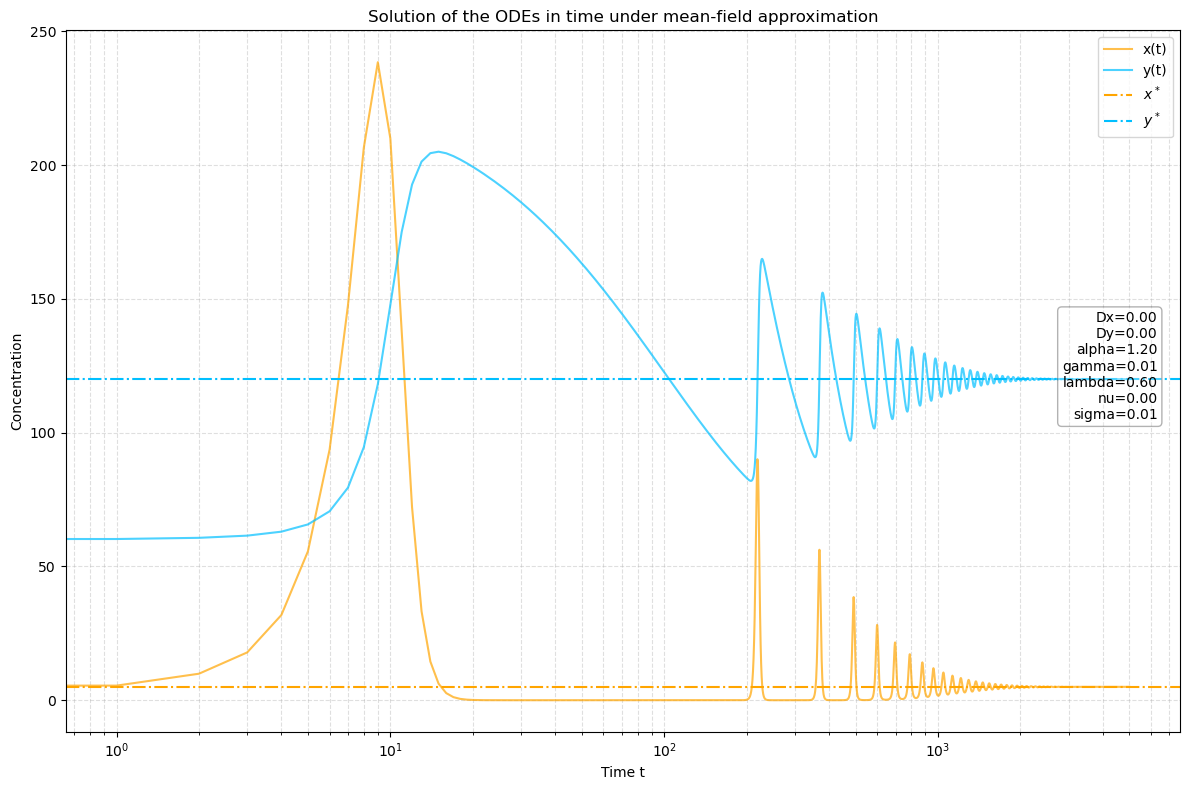

<Figure size 640x480 with 0 Axes>

In [2]:
# set initial conditions
#z0 = np.array([3,np.random.poisson(lam=1)])    # z=[x,y]
#z0 = np.array([x_star,y_star])    # z=[x*,y*] (I try to initialize at a fixed point to verify stability)
z0 = np.array([3,y0])

# Solve
X_ode = odeint(m.system,z0,t_s,args=(par,))[:,0]
Y_ode = odeint(m.system,z0,t_s,args=(par,))[:,1]

'''
# Normalization
X_ode /= np.max(X_ode)
Y_ode /= np.max(Y_ode)

y_tilde = Y_ode[np.argmin(np.abs(X_ode-1))]
Dt1 = (1/par['gamma'])*(np.log((y_tilde-
                                par['gamma']/par['sigma'])/
                               (par['alpha']/par['gamma']-
                               par['lambda']/par['sigma'])))
'''

# Solution of the X ODE
plt.figure(figsize=(12,8))
plt.plot(t_s, X_ode, c='orange', label='x(t)',alpha=0.7)
plt.plot(t_s, Y_ode, c='deepskyblue', label='y(t)',alpha=0.7)
plt.title('Solution of the ODEs in time under mean-field approximation')
plt.axhline(y=x_star,label=r'$x^*$',c='orange',linestyle='-.')
plt.axhline(y=y_star,label=r'$y^*$',c='deepskyblue',linestyle='-.')
plt.xlabel('Time t')
plt.ylabel('Concentration')
plt.xscale('log')
plt.grid(True, which="both",alpha=0.4,linestyle='--')
m.add_par_box(par)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
plt.savefig('plots/ODE.png')

The time it takes for $y$ to reach $\tilde{y}$, which is the value of $y$ for which $x=1$, is approximately:
$$
\Delta t_1 = \frac{1}{\gamma}\ln\left(\frac{\tilde{y}-\frac{\lambda}{\sigma}}{\frac{\alpha}{\gamma}-\frac{\lambda}{\sigma}}\right)
$$
while, the time it takes for $x$ to increase from 1 to a larger number $k$ is:
$$
\Delta t_2 = \frac{1}{\alpha}\ln k
$$
Now I recreate the trajectory of the solutions of the ODE

In which regime are we? First regime:(0,y_0) unstable, (x*,y*) stable
The attractor (x*,y*) is a stable spiral (negative discriminant -> damped oscillations)


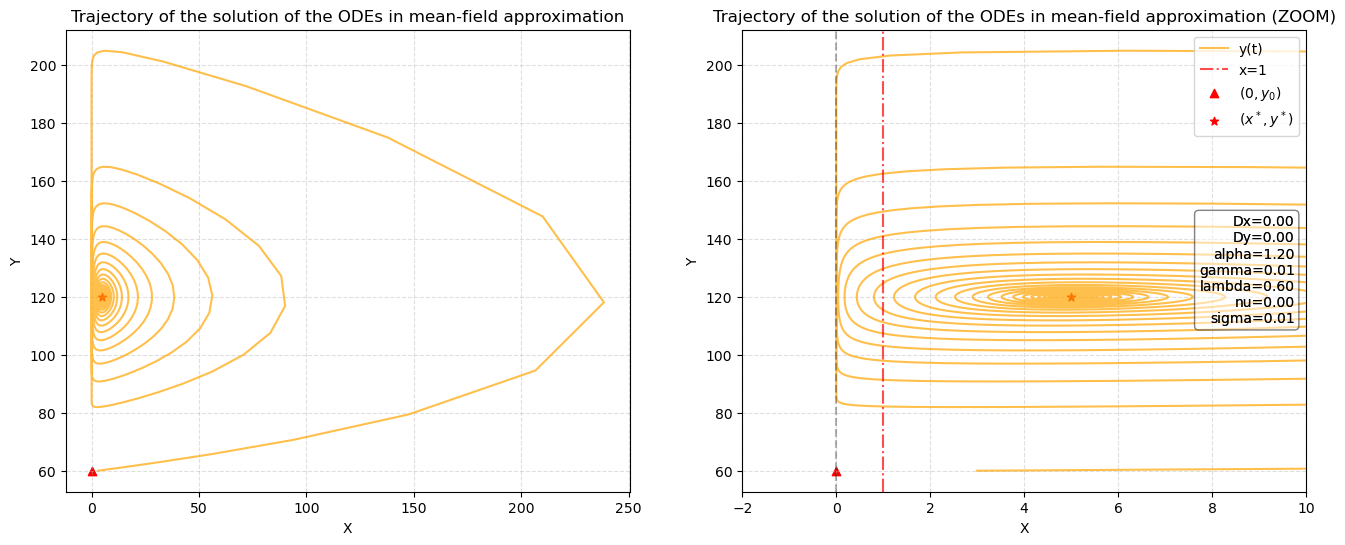

In [3]:
m.stability(par)

fig,ax = plt.subplots(1,2,figsize=(16,6))
# Trajectory of the solutions over time
ax[0].plot(X_ode, Y_ode, c='orange', label='y(t)',alpha=0.7)
ax[0].set_title('Trajectory of the solution of the ODEs in mean-field approximation')
ax[0].scatter(0,y0, c='r',marker='^',label=r'$(0,y_0)$')
ax[0].scatter(x_star,y_star, c='r',marker='*',label=r'$(x^*,y^*)$')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].grid(True, which="both",alpha=0.4,linestyle='--')
m.add_par_box(par)

# Trajectory of the solutions over time zoomed
ax[1].plot(X_ode, Y_ode, c='orange', label='y(t)',alpha=0.7)
ax[1].axvline(1,c='r',linestyle='-.',label='x=1',alpha=0.7)
ax[1].axvline(0,c='black',linestyle='--',alpha=0.3)
ax[1].set_title('Trajectory of the solution of the ODEs in mean-field approximation (ZOOM)')
ax[1].scatter(0,y0, c='r',marker='^',label=r'$(0,y_0)$')
ax[1].scatter(x_star,y_star, c='r',marker='*',label=r'$(x^*,y^*)$')
ax[1].set_xlim(-2,10)
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
ax[1].grid(True, which="both",alpha=0.4,linestyle='--')
m.add_par_box(par)
plt.legend(loc='upper right')
plt.savefig('plots/Traj_ODE.png')

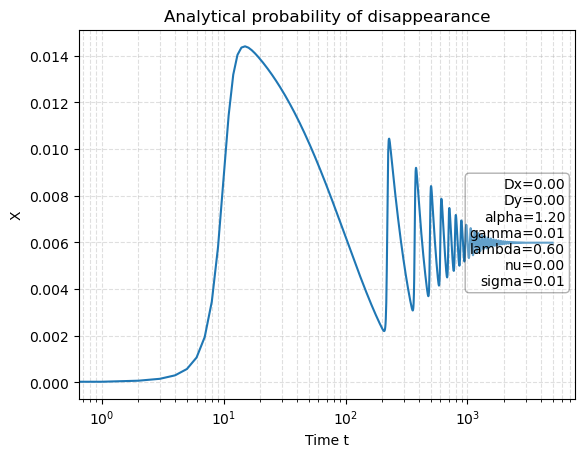

In [4]:
def P_da(x,y,par,y0):
    # this I've obtained from the expression for the disappearance probability at page 4 (see paper notes)
    #return 1-np.exp(-par['gamma']*(par['lambda']+y*(par['nu']*x-par['sigma'])-par['sigma']*y0))
    return 1-np.exp(-par['gamma']*par['sigma']*(y-y0))      # here, as suggested in page 3, I ignore the term $\nu xy$ in y', since x is small.
    #return par['gamma']*y
    
#plt.plot(P_da(X_ode,Y_ode,par,y0)/np.max(P_da(X_ode,Y_ode,par,y0)))
plt.plot(P_da(X_ode,Y_ode,par,y0))
plt.title('Analytical probability of disappearance')
plt.xlabel('Time t')
plt.ylabel('X')
plt.xscale('log')
plt.grid(True, which="both",alpha=0.4,linestyle='--')
# Create a box plot for the parameters in 'par'
m.add_par_box(par)

## Lattice ##
The interactions between pathogens and lymphocytes are described by the following reactions:
$$
\begin{gather}
    X \xrightarrow{\alpha} X + X \\
    \emptyset \xrightarrow{\lambda} Y \\
    X + Y \xrightarrow{\gamma} Y  \\
    X + Y \xrightarrow{\nu} X + 2Y \\
    Y \xrightarrow{\sigma} \emptyset .
\end{gather}
$$
### 1D ##
Firstly, I try a toy model of a 1D lattice with 100 cells and no diffusion (mean-field approximation):

In [5]:
par['alpha'] = 1.6
par['nu'] = 0.001
par

{'alpha': 1.6,
 'gamma': 0.01,
 'lambda': 0.6,
 'nu': 0.001,
 'sigma': 0.01,
 'Dx': 0.0,
 'Dy': 0.0}

In which regime are we? First regime:(0,y_0) unstable, (x*,y*) stable
The attractor (x*,y*) is a stable spiral (negative discriminant -> damped oscillations)


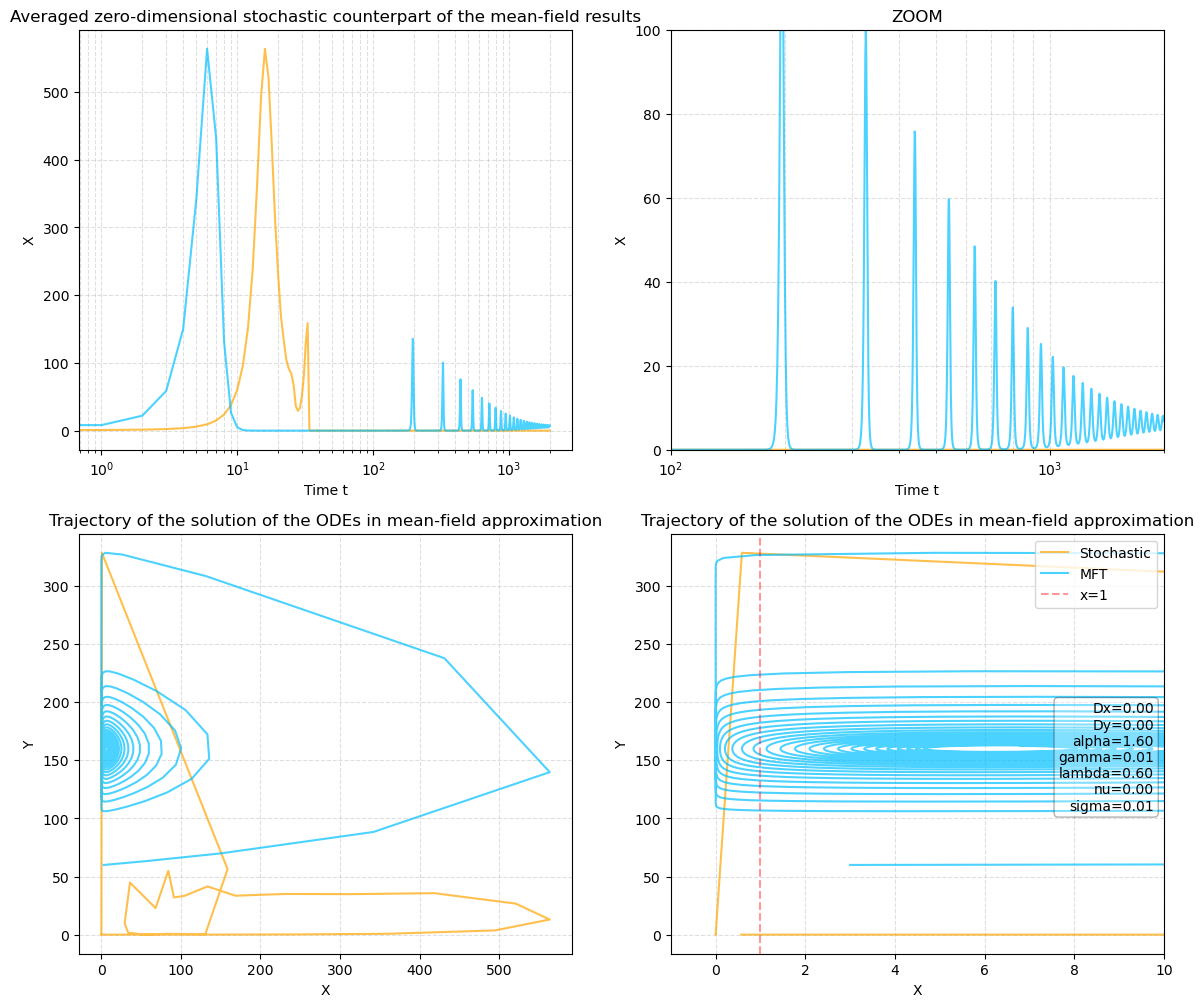

In [6]:
m.stability(par)
time_steps = 2000    # 1000
t_s = np.linspace(0,time_steps,time_steps)
z0 = np.array([3,y0])       # set initial conditions
# Solve again the ODEs so to have it with the right parameters, in case that they're different for the stochastic case
X_ode = odeint(m.system,z0,t_s,args=(par,))[:,0]
Y_ode = odeint(m.system,z0,t_s,args=(par,))[:,1]
# Compute the model
args = [10000,time_steps,par,False]     # [N,time_steps,par,fill]
X_stoc, Y_stoc = m.lattice1(args)

scalex = np.max(X_stoc)/np.max(X_ode)
scaley = np.max(Y_stoc)/np.max(Y_ode)
# plot the evolution of x(t)
fig, ax = plt.subplots(2,2,figsize=(14,12))
ax[0,0].plot(X_stoc/scalex,c='orange',label='x(t)-Stochastic',alpha=0.7)
ax[0,0].plot(X_ode,c='deepskyblue',label='x(t)-MFT',alpha=0.7)          # multiplied by 4 only for scaling
#ax[0,0].axhline(x_star,c='r',linestyle='--',label=r'$x^*$',alpha=0.7)
ax[0,0].set_title('Averaged zero-dimensional stochastic counterpart of the mean-field results')
ax[0,0].set_xlabel('Time t')
ax[0,0].set_ylabel('X')
ax[0,0].set_xscale('log')
ax[0,0].grid(True, which="both",alpha=0.4,linestyle='--')

ax[0,1].plot(X_stoc/scalex,c='orange',label='x(t)-Stochastic',alpha=0.7)
ax[0,1].plot(X_ode,c='deepskyblue',label='x(t)-MFT',alpha=0.7)
#ax[0,1].axhline(x_star,c='r',linestyle='--',label=r'$x^*$',alpha=0.7)
ax[0,1].set_title('ZOOM')
ax[0,1].set_xlim(100,time_steps)
ax[0,1].set_ylim(0,100)
ax[0,1].set_xlabel('Time t')
ax[0,1].set_ylabel('X')
ax[0,1].set_xscale('log')
ax[0,1].grid(True, which="both",alpha=0.4,linestyle='--')

ax[1,0].plot(X_stoc/scalex, Y_stoc/scaley, c='orange', label='Stochastic',alpha=0.7)
ax[1,0].plot(X_ode, Y_ode, c='deepskyblue', label='MFT',alpha=0.7)
ax[1,0].set_title('Trajectory of the solution of the ODEs in mean-field approximation')
#ax[1,0].scatter(0,y0, c='r',marker='^',label=r'$(0,y_0)$')
#ax[1,0].scatter(x_star,y_star, c='r',marker='*',label=r'$(x^*,y^*)$')
ax[1,0].set_xlabel('X')
ax[1,0].set_ylabel('Y')
ax[1,0].grid(True, which="both",alpha=0.4,linestyle='--')

ax[1,1].plot(X_stoc/scalex, Y_stoc/scaley, c='orange', label='Stochastic',alpha=0.7)
ax[1,1].plot(X_ode, Y_ode, c='deepskyblue', label='MFT',alpha=0.7)
ax[1,1].axvline(x=1,c='r',label='x=1',linestyle='--',alpha=0.4)
ax[1,1].set_title('Trajectory of the solution of the ODEs in mean-field approximation')
#ax[1,1].scatter(0,y0, c='r',marker='^',label=r'$(0,y_0)$')
#ax[1,1].scatter(x_star,y_star, c='r',marker='*',label=r'$(x^*,y^*)$')
ax[1,1].set_xlim(-1,10)
ax[1,1].set_xlabel('X')
ax[1,1].set_ylabel('Y')
ax[1,1].grid(True, which="both",alpha=0.4,linestyle='--')
m.add_par_box(par)
plt.legend(loc='upper right')
plt.savefig('plots/stochastic1.png')
plt.show()

Now I study the disappearance probability at the first pass near zero as a function of the distance between the two stable points.\
I only check for having zero pathogen for the zero-pathogen absorbing state; for now I don't care about Y.

I try to use as the first pass near-zero the moment for whihc $y\sim \alpha / \gamma$. In the paper, this is said to happen after a time $\Delta t_1$:
$$
\Delta t_1 = \frac{1}{\sigma}\ln\left[\frac{(\tilde{y} - \frac{\lambda}{\sigma})}{
(\frac{\alpha}{\gamma}-\frac{\lambda}{\sigma})}\right]
$$
where $\tilde{y}$ is the value of $y$ for which $x=1$.\
Such value, we can either extract it analitically from the ODEs or we can retrieve it through simulations. \
As a first approach, we will do the former.

In [7]:
par['alpha'] = 1.2
par['gamma'] = 0.1
par['lambda'] = 0.4
par['sigma'] = 0.1
par

{'alpha': 1.2,
 'gamma': 0.1,
 'lambda': 0.4,
 'nu': 0.001,
 'sigma': 0.1,
 'Dx': 0.0,
 'Dy': 0.0}

In [8]:
'''
P_diss = m.P_diss(m.lattice1,num_nu=100,n_iter=50,N=10000,time_steps=400,par=par)

plt.figure(figsize=(12,8))
plt.plot(P_diss[:,0],P_diss[:,1],c='orange')
plt.xscale('log')
plt.title('Probability of disappearance vs distance between the fixed points')
plt.xlabel('Distance between fixed points')
plt.ylabel('Probability of disappearance')
plt.grid(True, which='both',alpha=0.7)
#plt.savefig('plots/Pdiss.png')
plt.show()
'''

"\nP_diss = m.P_diss(m.lattice1,num_nu=100,n_iter=50,N=10000,time_steps=400,par=par)\n\nplt.figure(figsize=(12,8))\nplt.plot(P_diss[:,0],P_diss[:,1],c='orange')\nplt.xscale('log')\nplt.title('Probability of disappearance vs distance between the fixed points')\nplt.xlabel('Distance between fixed points')\nplt.ylabel('Probability of disappearance')\nplt.grid(True, which='both',alpha=0.7)\n#plt.savefig('plots/Pdiss.png')\nplt.show()\n"

## Diffusion
Now diffusion is added to the stochastic model. In particular, we have an isotropic discrete diffusion regulated by two coefficients, $D_{x}$ and $D_{y}$, for the two populations, respectively pathogens ($x$) and immune system ($y$). The diffusive process is carried out as a Poisson number with mean, e.g. for the pathogen population, $\lambda=D_{x}x$ (where $x$ is the population of the starting site), subtracted from the starting site and added to its neighbours. 

In [9]:
par['alpha']=1.6
par['gamma']=0.01
par['lambda']=0.6
par['nu']=0.001
par['sigma']=0.01
print(par)
m.stability(par)

{'alpha': 1.6, 'gamma': 0.01, 'lambda': 0.6, 'nu': 0.001, 'sigma': 0.01, 'Dx': 0.0, 'Dy': 0.0}
In which regime are we? First regime:(0,y_0) unstable, (x*,y*) stable
The attractor (x*,y*) is a stable spiral (negative discriminant -> damped oscillations)


### 1D

In [10]:
'''
time_steps = 2000    # 1000
t_s = np.linspace(0,time_steps,time_steps)
z0 = np.array([3,y0])       # set initial conditions
# Solve again the ODEs so to have it with the right parameters, in case that they're different for the stochastic case
X_ode = odeint(m.system,z0,t_s,args=(par,))[:,0]
Y_ode = odeint(m.system,z0,t_s,args=(par,))[:,1]
# Stochastic model with NO DIFFUSION
args = [10000,time_steps,par,False]     # [N,time_steps,par,fill]
X_stoc, Y_stoc = m.lattice1(args)
# Stochastic model with DIFFUSION on x
par['Dx']=2
par['Dy']=2
args = [10000,time_steps,par,False]     # [N,time_steps,par,fill]
X_diff, Y_diff = m.lattice1(args)

scalex = np.max(X_stoc)/np.max(X_ode)
scaley = np.max(Y_stoc)/np.max(Y_ode)
fig, ax = plt.subplots(2,2,figsize=(14,12))
# plot the evolution of x(t)
ax[0,0].plot(X_ode,c='deepskyblue',label='x(t)-MFT',alpha=0.7)          # multiplied by 4 only for scaling
ax[0,0].plot(X_stoc/scalex,c='orange',label=r'x(t)-Stochastic,$D_{x}=0$',alpha=0.7)
ax[0,0].plot(X_diff/scalex,c='green',label=r'x(t)-Stochastic,$D_{x}=2$',alpha=0.7)
ax[0,0].set_title('Mean field vs stochastic, with and without diffusion (1D)')
ax[0,0].set_xlabel('Time t')
ax[0,0].set_ylabel('X')
ax[0,0].set_xscale('log')
ax[0,0].grid(True, which="both",alpha=0.4,linestyle='--')

ax[0,1].plot(X_ode,c='deepskyblue',label='x(t)-MFT',alpha=0.7)
ax[0,1].plot(X_stoc/scalex,c='orange',label=r'x(t)-Stochastic,$D_{x}=0$',alpha=0.7)
ax[0,1].plot(X_diff/scalex,c='green',label=r'x(t)-Stochastic,$D_{x}=2$',alpha=0.7)
#ax[0,1].axhline(x_star,c='r',linestyle='--',label=r'$x^*$',alpha=0.7)
ax[0,1].set_title('ZOOM')
ax[0,1].set_xlim(100,time_steps)
ax[0,1].set_ylim(0,100)
ax[0,1].set_xlabel('Time t')
ax[0,1].set_ylabel('X')
ax[0,1].set_xscale('log')
ax[0,1].grid(True, which="both",alpha=0.4,linestyle='--')

ax[1,0].plot(X_ode, Y_ode, c='deepskyblue', label='MFT',alpha=0.7)
ax[1,0].plot(X_stoc/scalex, Y_stoc/scaley, c='orange', label=r'Stochastic,$D_{x}=0$',alpha=0.7)
ax[1,0].plot(X_diff/scalex, Y_diff/scaley, c='green', label=r'Stochastic,$D_{x}=2$',alpha=0.7)
ax[1,0].set_title('Trajectory of the solutions (1D)')
#ax[1,0].scatter(0,y0, c='r',marker='^',label=r'$(0,y_0)$')
#ax[1,0].scatter(x_star,y_star, c='r',marker='*',label=r'$(x^*,y^*)$')
ax[1,0].set_xlabel('X')
ax[1,0].set_ylabel('Y')
ax[1,0].grid(True, which="both",alpha=0.4,linestyle='--')

ax[1,1].plot(X_ode, Y_ode, c='deepskyblue', label='MFT',alpha=0.7)
ax[1,1].plot(X_stoc/scalex, Y_stoc/scaley, c='orange', label=r'Stochastic,$D_{x}=0$',alpha=0.7)
ax[1,1].plot(X_diff/scalex, Y_diff/scaley, c='green', label=r'Stochastic,$D_{x}=2$',alpha=0.7)
ax[1,1].set_title('ZOOM')
#ax[1,1].scatter(0,y0, c='r',marker='^',label=r'$(0,y_0)$')
#ax[1,1].scatter(x_star,y_star, c='r',marker='*',label=r'$(x^*,y^*)$')
ax[1,1].axvline(x=1,c='r',label='x=1',linestyle='--',alpha=0.4)
ax[1,1].set_xlim(-1,10)
ax[1,1].set_xlabel('X')
ax[1,1].set_ylabel('Y')
ax[1,1].grid(True, which="both",alpha=0.4,linestyle='--')
m.add_par_box(par)
plt.legend(loc='upper right')
plt.savefig('plots/diffusion1d.png')
plt.show()
'''

'\ntime_steps = 2000    # 1000\nt_s = np.linspace(0,time_steps,time_steps)\nz0 = np.array([3,y0])       # set initial conditions\n# Solve again the ODEs so to have it with the right parameters, in case that they\'re different for the stochastic case\nX_ode = odeint(m.system,z0,t_s,args=(par,))[:,0]\nY_ode = odeint(m.system,z0,t_s,args=(par,))[:,1]\n# Stochastic model with NO DIFFUSION\nargs = [10000,time_steps,par,False]     # [N,time_steps,par,fill]\nX_stoc, Y_stoc = m.lattice1(args)\n# Stochastic model with DIFFUSION on x\npar[\'Dx\']=2\npar[\'Dy\']=2\nargs = [10000,time_steps,par,False]     # [N,time_steps,par,fill]\nX_diff, Y_diff = m.lattice1(args)\n\nscalex = np.max(X_stoc)/np.max(X_ode)\nscaley = np.max(Y_stoc)/np.max(Y_ode)\nfig, ax = plt.subplots(2,2,figsize=(14,12))\n# plot the evolution of x(t)\nax[0,0].plot(X_ode,c=\'deepskyblue\',label=\'x(t)-MFT\',alpha=0.7)          # multiplied by 4 only for scaling\nax[0,0].plot(X_stoc/scalex,c=\'orange\',label=r\'x(t)-Stochastic,$D_{x

### 2D

In [11]:
'''
time_steps = 2000    # 1000
t_s = np.linspace(0,time_steps,time_steps)
z0 = np.array([3,y0])       # set initial conditions
# Solve again the ODEs so to have it with the right parameters, in case that they're different for the stochastic case
X_ode = odeint(m.system,z0,t_s,args=(par,))[:,0]
Y_ode = odeint(m.system,z0,t_s,args=(par,))[:,1]
# Stochastic model with NO DIFFUSION
par['Dx']=0
par['Dy']=0
args = [10,time_steps,par,False]     # [N,time_steps,par,fill]
X_stoc, Y_stoc = m.lattice2(args)
# Stochastic model with DIFFUSION on x
par['Dx']=2
par['Dy']=2
args = [10000,time_steps,par,False]     # [N,time_steps,par,fill]
X_diff, Y_diff = m.lattice2(args)

scalex = np.max(X_stoc)/np.max(X_ode)
scaley = np.max(Y_stoc)/np.max(Y_ode)
Dscalex = np.max(X_diff)/np.max(X_ode)
Dscaley = np.max(Y_diff)/np.max(Y_ode)
fig, ax = plt.subplots(2,2,figsize=(14,12))
# plot the evolution of x(t)
ax[0,0].plot(X_ode,c='deepskyblue',label='x(t)-MFT',alpha=0.7)          # multiplied by 4 only for scaling
ax[0,0].plot(X_stoc/scalex,c='orange',label=r'x(t)-Stochastic,$D_{x}=0$',alpha=0.7)
ax[0,0].plot(X_diff/Dscalex,c='green',label=r'x(t)-Stochastic,$D_{x}=2$',alpha=0.7)
ax[0,0].set_title('Mean field vs stochastic, with and without diffusion (2D)')
ax[0,0].set_xlabel('Time t')
ax[0,0].set_ylabel('X')
ax[0,0].set_xscale('log')
ax[0,0].grid(True, which="both",alpha=0.4,linestyle='--')

ax[0,1].plot(X_ode,c='deepskyblue',label='x(t)-MFT',alpha=0.7)
ax[0,1].plot(X_stoc/scalex,c='orange',label=r'x(t)-Stochastic,$D_{x}=0$',alpha=0.7)
ax[0,1].plot(X_diff/Dscalex,c='green',label=r'x(t)-Stochastic,$D_{x}=2$',alpha=0.7)
#ax[0,1].axhline(x_star,c='r',linestyle='--',label=r'$x^*$',alpha=0.7)
ax[0,1].set_title('ZOOM')
ax[0,1].set_xlim(100,time_steps)
ax[0,1].set_ylim(0,100)
ax[0,1].set_xlabel('Time t')
ax[0,1].set_ylabel('X')
ax[0,1].set_xscale('log')
ax[0,1].grid(True, which="both",alpha=0.4,linestyle='--')

ax[1,0].plot(X_ode, Y_ode, c='deepskyblue', label='MFT',alpha=0.7)
ax[1,0].plot(X_stoc/scalex, Y_stoc/scaley, c='orange', label=r'Stochastic,$D_{x}=0$',alpha=0.7)
ax[1,0].plot(X_diff/Dscalex, Y_diff/Dscaley, c='green', label=r'Stochastic,$D_{x}=2$',alpha=0.7)
ax[1,0].set_title('Trajectory of the solutions (2D)')
#ax[1,0].scatter(0,y0, c='r',marker='^',label=r'$(0,y_0)$')
#ax[1,0].scatter(x_star,y_star, c='r',marker='*',label=r'$(x^*,y^*)$')
ax[1,0].set_xlabel('X')
ax[1,0].set_ylabel('Y')
ax[1,0].grid(True, which="both",alpha=0.4,linestyle='--')

ax[1,1].plot(X_ode, Y_ode, c='deepskyblue', label='MFT',alpha=0.7)
ax[1,1].plot(X_stoc/scalex, Y_stoc/scaley, c='orange', label=r'Stochastic,$D_{x}=0$',alpha=0.7)
ax[1,1].plot(X_diff/Dscalex, Y_diff/Dscaley, c='green', label=r'Stochastic,$D_{x}=2$',alpha=0.7)
ax[1,1].set_title('ZOOM')
#ax[1,1].scatter(0,y0, c='r',marker='^',label=r'$(0,y_0)$')
#ax[1,1].scatter(x_star,y_star, c='r',marker='*',label=r'$(x^*,y^*)$')
ax[1,1].axvline(x=1,c='r',label='x=1',linestyle='--',alpha=0.4)
ax[1,1].set_xlim(-1,10)
ax[1,1].set_xlabel('X')
ax[1,1].set_ylabel('Y')
ax[1,1].grid(True, which="both",alpha=0.4,linestyle='--')
m.add_par_box(par)
plt.legend(loc='upper right')
plt.savefig('plots/diffusion2d.png')
plt.show()
'''

'\ntime_steps = 2000    # 1000\nt_s = np.linspace(0,time_steps,time_steps)\nz0 = np.array([3,y0])       # set initial conditions\n# Solve again the ODEs so to have it with the right parameters, in case that they\'re different for the stochastic case\nX_ode = odeint(m.system,z0,t_s,args=(par,))[:,0]\nY_ode = odeint(m.system,z0,t_s,args=(par,))[:,1]\n# Stochastic model with NO DIFFUSION\npar[\'Dx\']=0\npar[\'Dy\']=0\nargs = [10,time_steps,par,False]     # [N,time_steps,par,fill]\nX_stoc, Y_stoc = m.lattice2(args)\n# Stochastic model with DIFFUSION on x\npar[\'Dx\']=2\npar[\'Dy\']=2\nargs = [10000,time_steps,par,False]     # [N,time_steps,par,fill]\nX_diff, Y_diff = m.lattice2(args)\n\nscalex = np.max(X_stoc)/np.max(X_ode)\nscaley = np.max(Y_stoc)/np.max(Y_ode)\nDscalex = np.max(X_diff)/np.max(X_ode)\nDscaley = np.max(Y_diff)/np.max(Y_ode)\nfig, ax = plt.subplots(2,2,figsize=(14,12))\n# plot the evolution of x(t)\nax[0,0].plot(X_ode,c=\'deepskyblue\',label=\'x(t)-MFT\',alpha=0.7)         

# Filling Fraction: Direct Percolation vs Stochastic Diffusion

In [12]:
par['alpha']=1.2
par['gamma']=0.2
par['lambda']=0.6
par['nu']=0.08
par['sigma']=0.58
par['Dy']=0.025
m.stability(par)
par

In which regime are we? First regime:(0,y_0) unstable, (x*,y*) stable
The attractor (x*,y*) is a stable spiral (negative discriminant -> damped oscillations)


{'alpha': 1.2,
 'gamma': 0.2,
 'lambda': 0.6,
 'nu': 0.08,
 'sigma': 0.58,
 'Dx': 0.0,
 'Dy': 0.025}

### 1D

DP: set#0
DP: set#1
DP: set#4
DP: set#5
ST: set#0
ST: set#10


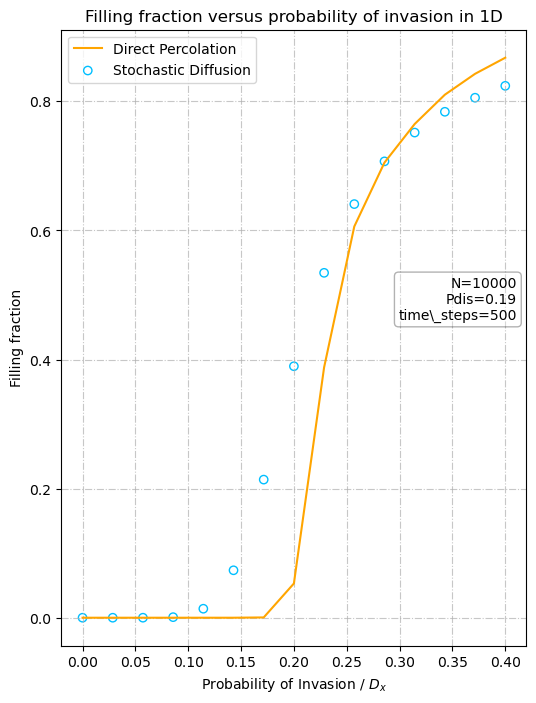

In [18]:

n_iter = 50     # number of iterations per set of parameters
Pspan = np.linspace(0,0.4,15)     # set of probabiilty of invasion
dim = 1
models_DP = [m.DP1d,m.DP2d,m.DP3d]
params_DP = [10000, 500, 0.19, n_iter]      # [N, timesteps, Pdis, n_iter]
fillings_DP1 = m.filling_fraction_DP(model=models_DP[dim-1],Pspan=Pspan,params=params_DP)
models_ST = [m.lattice1,m.lattice2]
params_ST = [10000, 500, par, n_iter, 1]   
fillings_ST1 = m.filling_fraction_ST(model=models_ST[dim-1],Pspan=Pspan,params=params_ST)

plt.figure(figsize=(6,8))
plt.plot(fillings_DP1[0,:],fillings_DP1[1,:],c='orange',label='Direct Percolation')
plt.scatter(fillings_ST1[0,:],fillings_ST1[1,:],label='Stochastic Diffusion',facecolors='none', edgecolors='deepskyblue')
plt.title(f'Filling fraction versus probability of invasion in {dim}D')
plt.xlabel(r'Probability of Invasion / $D_{x}$')
plt.ylabel('Filling fraction')
plt.grid(True,which='both',alpha=0.7,linestyle='-.')
m.add_par_box({'N': params_DP[0], 'time_steps': params_DP[1], 'Pdis': params_DP[2]})
plt.savefig(f'plots/filling{dim}D.png')
plt.legend()
plt.show()

### 2D

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import odeint

import model as m       # Python file with all the functions

# set the seed
np.random.seed(12345)
# I set some parameters for the whole project
time_steps = 5000    # 1000
# Set the time grid for the ODEs
t_s = np.linspace(0,time_steps,time_steps)
# parameters initialization (I use the parameters listed in the caption of Figure 3)
par = {
    'alpha': 1.2,   # 1.2
    'gamma': 0.01,   # questo sarebbe 0.01
    'lambda': 0.6,
    'nu': 0.001,
    'sigma': 0.01,
    'Dx': 0.,       # diffusion of x
    'Dy': 0.        # diffusion of y
}
# Define some meaningful quantities for the analysis
y0 = par['lambda']/par['sigma']
#y0 = 4 # from Figure 1
y_star = par['alpha']/par['gamma']
x_star = (par['sigma']-par['lambda']*par['gamma']/par['alpha'])/par['nu']

par['alpha']=1.2
par['gamma']=0.2
par['lambda']=0.6
par['nu']=0.08
par['sigma']=0.58
par['Dy']=0.025
m.stability(par)
par

In which regime are we? First regime:(0,y_0) unstable, (x*,y*) stable
The attractor (x*,y*) is a stable spiral (negative discriminant -> damped oscillations)


{'alpha': 1.2,
 'gamma': 0.2,
 'lambda': 0.6,
 'nu': 0.08,
 'sigma': 0.58,
 'Dx': 0.0,
 'Dy': 0.025}

DP: set#0


DP: set#1
DP: set#4
DP: set#5
ST: set#0
ST: set#10


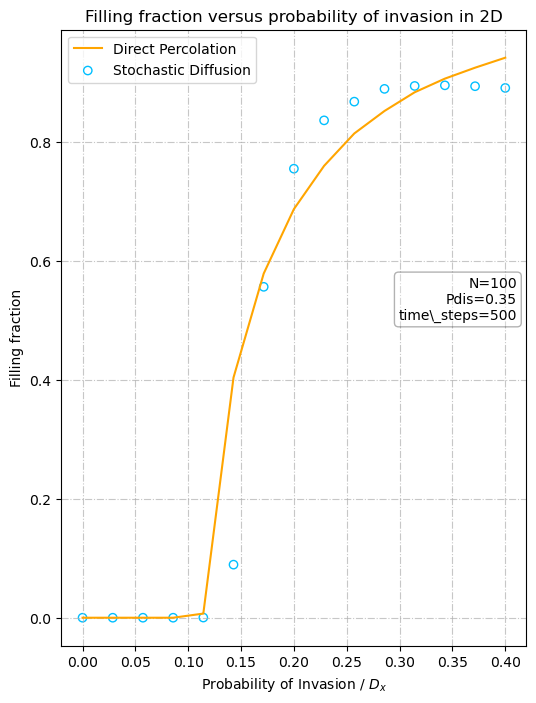

In [15]:
n_iter = 50     # number of iterations per set of parameters
Pspan = np.linspace(0,0.4,15)     # set of probabiilty of invasion
dim = 2
models_DP = [m.DP1d,m.DP2d,m.DP3d]
params_DP = [100, 500, 0.35, n_iter]      # [N, timesteps, Pdis, n_iter]
fillings_DP2 = m.filling_fraction_DP(model=models_DP[dim-1],Pspan=Pspan,params=params_DP)
models_ST = [m.lattice1,m.lattice2]
params_ST = [100, 500, par, n_iter, 1]   
fillings_ST2 = m.filling_fraction_ST(model=models_ST[dim-1],Pspan=Pspan,params=params_ST)

plt.figure(figsize=(6,8))
plt.plot(fillings_DP2[0,:],fillings_DP2[1,:],c='orange',label='Direct Percolation')
plt.scatter(fillings_ST2[0,:],fillings_ST2[1,:],label='Stochastic Diffusion',facecolors='none', edgecolors='deepskyblue')
plt.title(f'Filling fraction versus probability of invasion in {dim}D')
plt.xlabel(r'Probability of Invasion / $D_{x}$')
plt.ylabel('Filling fraction')
plt.grid(True,which='both',alpha=0.7,linestyle='-.')
m.add_par_box({'N': params_DP[0], 'time_steps': params_DP[1], 'Pdis': params_DP[2]})
plt.savefig(f'plots/filling{dim}D.png')
plt.legend()
plt.show()

DP: set#0


DP: set#1
DP: set#4
DP: set#5
ST: set#0
ST: set#10


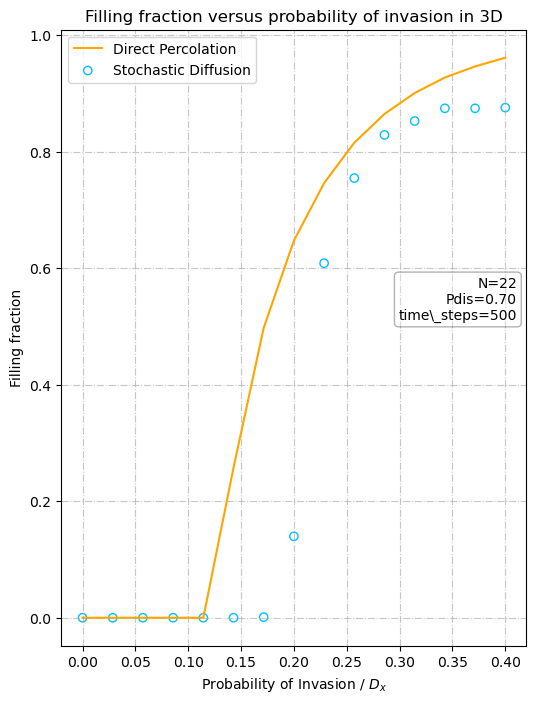

In [16]:
n_iter = 50     # number of iterations per set of parameters
Pspan = np.linspace(0,0.4,15)     # set of probabiilty of invasion
dim = 3
models_DP = [m.DP1d,m.DP2d,m.DP3d]
params_DP = [22, 500, 0.7, n_iter]      # [N, timesteps, Pdis, n_iter]
fillings_DP3 = m.filling_fraction_DP(model=models_DP[dim-1],Pspan=Pspan,params=params_DP)
models_ST = [m.lattice1,m.lattice2,m.lattice3]
params_ST = [22, 500, par, n_iter, 1]   
fillings_ST3 = m.filling_fraction_ST(model=models_ST[dim-1],Pspan=Pspan,params=params_ST)

plt.figure(figsize=(6,8))
plt.plot(fillings_DP3[0,:],fillings_DP3[1,:],c='orange',label='Direct Percolation')
plt.scatter(fillings_ST3[0,:],fillings_ST3[1,:],label='Stochastic Diffusion',facecolors='none', edgecolors='deepskyblue')
plt.title(f'Filling fraction versus probability of invasion in {dim}D')
plt.xlabel(r'Probability of Invasion / $D_{x}$')
plt.ylabel('Filling fraction')
plt.grid(True,which='both',alpha=0.7,linestyle='-.')
m.add_par_box({'N': params_DP[0], 'time_steps': params_DP[1], 'Pdis': params_DP[2]})
plt.savefig(f'plots/filling{dim}D.png')
plt.legend()
plt.show()

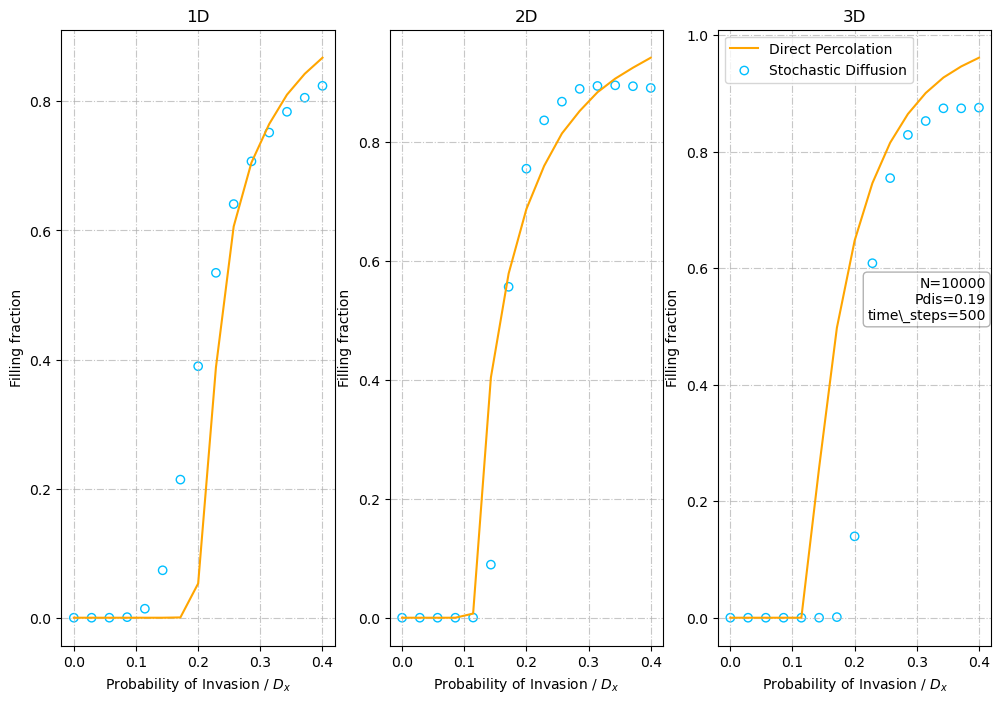

In [19]:
fig,ax = plt.subplots(1,3,figsize=(12,8))
ax[0].plot(fillings_DP1[0,:],fillings_DP1[1,:],c='orange',label='Direct Percolation')
ax[0].scatter(fillings_ST1[0,:],fillings_ST1[1,:],label='Stochastic Diffusion',facecolors='none', edgecolors='deepskyblue')
ax[0].set_title(f'1D')
ax[0].set_xlabel(r'Probability of Invasion / $D_{x}$')
ax[0].set_ylabel('Filling fraction')
ax[0].grid(True,which='both',alpha=0.7,linestyle='-.')

ax[1].plot(fillings_DP2[0,:],fillings_DP2[1,:],c='orange',label='Direct Percolation')
ax[1].scatter(fillings_ST2[0,:],fillings_ST2[1,:],label='Stochastic Diffusion',facecolors='none', edgecolors='deepskyblue')
ax[1].set_title(f'2D')
ax[1].set_xlabel(r'Probability of Invasion / $D_{x}$')
ax[1].set_ylabel('Filling fraction')
ax[1].grid(True,which='both',alpha=0.7,linestyle='-.')

ax[2].plot(fillings_DP3[0,:],fillings_DP3[1,:],c='orange',label='Direct Percolation')
ax[2].scatter(fillings_ST3[0,:],fillings_ST3[1,:],label='Stochastic Diffusion',facecolors='none', edgecolors='deepskyblue')
ax[2].set_title(f'3D')
ax[2].set_xlabel(r'Probability of Invasion / $D_{x}$')
ax[2].set_ylabel('Filling fraction')
ax[2].grid(True,which='both',alpha=0.7,linestyle='-.')
m.add_par_box({'N': params_DP[0], 'time_steps': params_DP[1], 'Pdis': params_DP[2]})
plt.savefig(f'plots/fillings.png')
plt.legend()
plt.show()

## Critical DIffusion Transition

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import odeint

import model as m       # Python file with all the functions

# set the seed
np.random.seed(12345)
# I set some parameters for the whole project
time_steps = 5000    # 1000
# Set the time grid for the ODEs
t_s = np.linspace(0,time_steps,time_steps)
# parameters initialization (I use the parameters listed in the caption of Figure 3)
par = {
    'alpha': 1.2,   # 1.2
    'gamma': 0.01,   # questo sarebbe 0.01
    'lambda': 0.6,
    'nu': 0.001,
    'sigma': 0.01,
    'Dx': 0.,       # diffusion of x
    'Dy': 0.        # diffusion of y
}
# Define some meaningful quantities for the analysis
y0 = par['lambda']/par['sigma']
#y0 = 4 # from Figure 1
y_star = par['alpha']/par['gamma']
x_star = (par['sigma']-par['lambda']*par['gamma']/par['alpha'])/par['nu']

par['alpha']=1.2
par['gamma']=0.1
par['lambda']=0.4
par['nu']=0.004
par['sigma']=0.1
par['Dy']=0.01
m.stability(par)
par

In which regime are we? First regime:(0,y_0) unstable, (x*,y*) stable
The attractor (x*,y*) is a stable spiral (negative discriminant -> damped oscillations)


{'alpha': 1.2,
 'gamma': 0.1,
 'lambda': 0.4,
 'nu': 0.004,
 'sigma': 0.1,
 'Dx': 0.0,
 'Dy': 0.01}

ST: set#0
ST: set#10
ST: set#20
ST: set#30
ST: set#40
ST: set#50
ST: set#60
ST: set#70
ST: set#80
ST: set#90


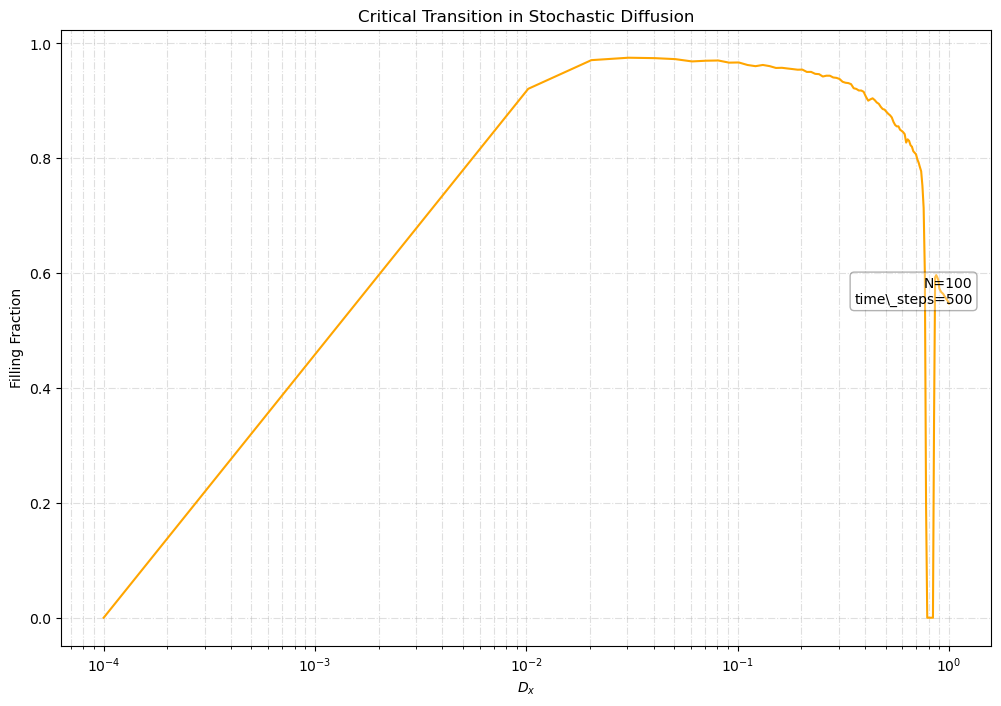

In [21]:
Dspan = np.linspace(1e-4,1,100) #100
params = [100, 500, par, 50, True] 
F = m.filling_fraction_ST(m.lattice2,Pspan=Dspan,params=params)

plt.figure(figsize=(12,8))
plt.plot(F[0,:],F[1,:],c='orange')
plt.xlabel(r'$D_{x}$')
plt.ylabel('Filling Fraction')
plt.xscale('log')
plt.title('Critical Transition in Stochastic Diffusion')
plt.grid(True,which='both',linestyle='-.',alpha=0.4)
m.add_par_box({'N': params[0], 'time_steps': params[1], 'Pdis': params[2]})
plt.savefig('plots/Figure4.png')
plt.show()

## Critical Exponents near DP threshold

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import odeint

import model as m       # Python file with all the functions

# set the seed
np.random.seed(12345)
# I set some parameters for the whole project
time_steps = 5000    # 1000
# Set the time grid for the ODEs
t_s = np.linspace(0,time_steps,time_steps)
# parameters initialization (I use the parameters listed in the caption of Figure 3)
par = {
    'alpha': 1.2,   # 1.2
    'gamma': 0.01,   # questo sarebbe 0.01
    'lambda': 0.6,
    'nu': 0.001,
    'sigma': 0.01,
    'Dx': 0.,       # diffusion of x
    'Dy': 0.        # diffusion of y
}
# Define some meaningful quantities for the analysis
y0 = par['lambda']/par['sigma']
#y0 = 4 # from Figure 1
y_star = par['alpha']/par['gamma']
x_star = (par['sigma']-par['lambda']*par['gamma']/par['alpha'])/par['nu']

par['alpha']=1.2
par['gamma']=0.2
par['lambda']=0.6
par['nu']=0.08
par['sigma']=0.58
par['Dy']=0.025
m.stability(par)
par

In which regime are we? First regime:(0,y_0) unstable, (x*,y*) stable
The attractor (x*,y*) is a stable spiral (negative discriminant -> damped oscillations)


{'alpha': 1.2,
 'gamma': 0.2,
 'lambda': 0.6,
 'nu': 0.08,
 'sigma': 0.58,
 'Dx': 0.0,
 'Dy': 0.025}

# Percolation Threshold $D^c_{x}$

ST: set#0


ST: set#10
ST: set#20
ST: set#30
ST: set#40
ST: set#50
ST: set#60
ST: set#70
ST: set#80
ST: set#90
ST: set#100
ST: set#110
ST: set#120
ST: set#130
ST: set#140
ST: set#150
ST: set#160
ST: set#170
ST: set#180
ST: set#190
ST: set#200
ST: set#210
ST: set#220
ST: set#230
ST: set#240
ST: set#250
ST: set#260
ST: set#270
ST: set#280
ST: set#290
ST: set#300
ST: set#310
ST: set#320
ST: set#330
ST: set#340
ST: set#350
ST: set#360
ST: set#370
ST: set#380
ST: set#390
ST: set#400
ST: set#410
ST: set#420
ST: set#430
ST: set#440
ST: set#450
ST: set#460
ST: set#470
ST: set#480
ST: set#490
ST: set#500
ST: set#510
ST: set#520
ST: set#530
ST: set#540
ST: set#550
ST: set#560
ST: set#570
ST: set#580
ST: set#590
ST: set#600
ST: set#610
ST: set#620
ST: set#630
ST: set#640
ST: set#650
ST: set#660
ST: set#670
ST: set#680
ST: set#690
ST: set#700
ST: set#710
ST: set#720
ST: set#730
ST: set#740
ST: set#750
ST: set#760
ST: set#770
ST: set#780
ST: set#790
ST: set#800
ST: set#810
ST: set#820
ST: set#830
ST: set#840
S

NameError: name 'params_DP' is not defined

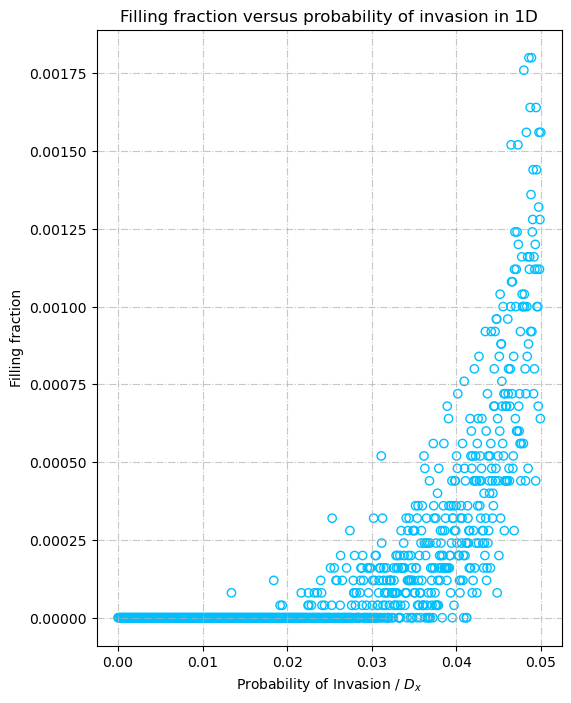

In [ ]:
dim = 1
n_iter = 50     # number of iterations per set of parameters
Pspan = np.linspace(0,0.05,1000)     # set of probabiilty of invasion
N = 500
time_steps = 250
models_ST = [m.lattice1,m.lattice2]
params_ST = [N, time_steps, par, n_iter, 1]   
fillings_ST1 = m.filling_fraction_ST(model=models_ST[dim-1],Pspan=Pspan,params=params_ST)

plt.figure(figsize=(6,8))
plt.scatter(fillings_ST1[0,:],fillings_ST1[1,:],label='Stochastic Diffusion',facecolors='none', edgecolors='deepskyblue')
plt.title(f'Filling fraction versus probability of invasion in {dim}D')
plt.xlabel(r'Probability of Invasion / $D_{x}$')
plt.ylabel('Filling fraction')
plt.grid(True,which='both',alpha=0.7,linestyle='-.')
m.add_par_box({'N': params_ST[0], 'time_steps': params_ST[1], 'Pdis': params_ST[2]})
plt.legend()
plt.show()

In [ ]:
DP_threshold1 = np.min(fillings_ST1[0,:][fillings_ST1[1,:] > 0])
print(f'The directed percolation threshold is evaluated as {DP_threshold1} for lattice (1+1)D, up to an accuracy of 0.00005')

The directed percolation threshold is evaluated as 0.013413413413413414 for lattice (1+1)D, up to an accuracy of 0.00005


In [25]:
dim = 2
n_iter = 50     # number of iterations per set of parameters
Pspan = np.linspace(0,0.1,100)     # set of probabiilty of invasion
N = 100
time_steps = 250
models_ST = [m.lattice1,m.lattice2]
params_ST = [N, time_steps, par, n_iter, 1]   
fillings_ST2 = m.filling_fraction_ST(model=models_ST[dim-1],Pspan=Pspan,params=params_ST)

plt.figure(figsize=(6,8))
plt.scatter(fillings_ST2[0,:],fillings_ST2[1,:],label='Stochastic Diffusion',facecolors='none', edgecolors='deepskyblue')
plt.title(f'Filling fraction versus probability of invasion in {dim}D')
plt.xlabel(r'Probability of Invasion / $D_{x}$')
plt.ylabel('Filling fraction')
plt.grid(True,which='both',alpha=0.7,linestyle='-.')
m.add_par_box({'N': params_ST[0], 'time_steps': params_ST[1], 'Pdis': params_ST[2]})
plt.legend()
plt.show()

ST: set#0
ST: set#10
ST: set#20
ST: set#30
ST: set#40
ST: set#50
ST: set#60


KeyboardInterrupt: 

In [ ]:
DP_threshold2 = np.min(fillings_ST2[0,:][fillings_ST2[1,:] > 0])
print(f'The directed percolation threshold is evaluated as {DP_threshold2} for lattice (1+1)D, up to an accuracy of 0.00005')

The directed percolation threshold is evaluated as 0.05757575757575758 for lattice (1+1)D, up to an accuracy of 0.00005


The percolation threshold was evaluated as $D^c_{x} = (0.01341\pm0.00005)$ for the ISP 1D model and $D^c_{x} = (0.0576\pm0.0005)$ for the ISP 2D model. 

## Critical Exponents
### $\delta$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import odeint
import os
import concurrent.futures
from scipy.optimize import curve_fit

import model as m       # Python file with all the functions

# set the seed
np.random.seed(12345)
# I set some parameters for the whole project
time_steps = 5000    # 1000
# Set the time grid for the ODEs
t_s = np.linspace(0,time_steps,time_steps)
# parameters initialization (I use the parameters listed in the caption of Figure 3)
par = {
    'alpha': 1.2,   # 1.2
    'gamma': 0.01,   # questo sarebbe 0.01
    'lambda': 0.6,
    'nu': 0.001,
    'sigma': 0.01,
    'Dx': 0.,       # diffusion of x
    'Dy': 0.        # diffusion of y
}
# Define some meaningful quantities for the analysis
y0 = par['lambda']/par['sigma']
#y0 = 4 # from Figure 1
y_star = par['alpha']/par['gamma']
x_star = (par['sigma']-par['lambda']*par['gamma']/par['alpha'])/par['nu']

par['alpha']=1.2
par['gamma']=0.2
par['lambda']=0.6
par['nu']=0.08
par['sigma']=0.58
par['Dy']=0.025
m.stability(par)
par

In which regime are we? First regime:(0,y_0) unstable, (x*,y*) stable
The attractor (x*,y*) is a stable spiral (negative discriminant -> damped oscillations)


{'alpha': 1.2,
 'gamma': 0.2,
 'lambda': 0.6,
 'nu': 0.08,
 'sigma': 0.58,
 'Dx': 0.0,
 'Dy': 0.025}

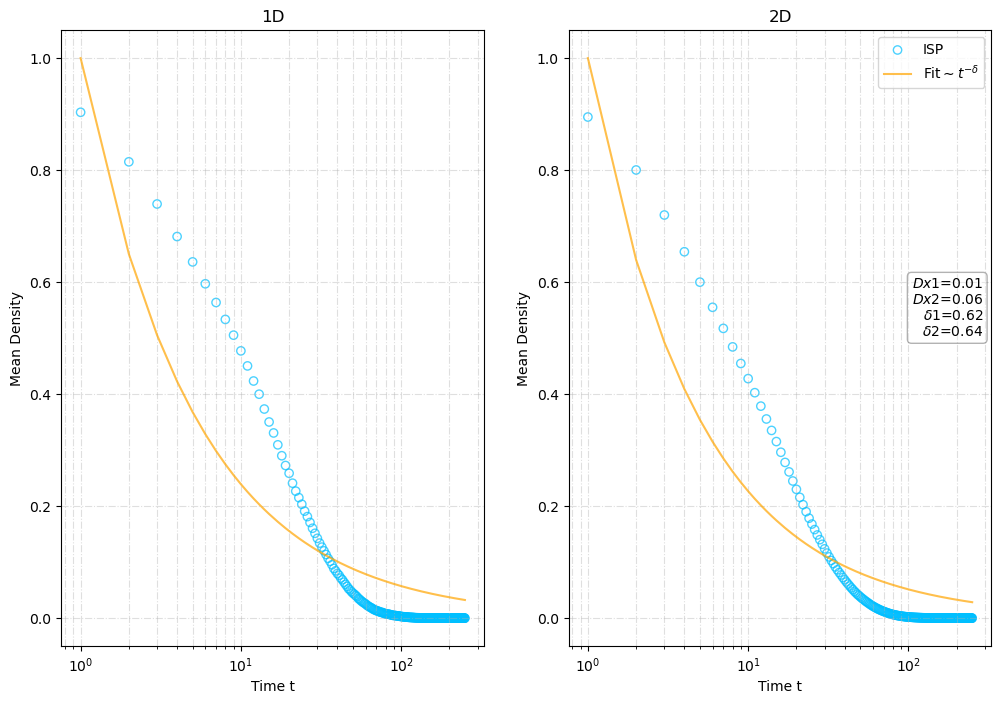

Best estimate of parameter delta for ISP 1D: (0.62125 ± 0.01562)
Best estimate of parameter delta for ISP 2D: (0.64474 ± 0.01518)


/tmp/ipykernel_117966/2681899643.py:62: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Best estimate of parameter delta for ISP 1D: ({float(best_delta1):.5f} ± {float(best_error1):.5f})")
/tmp/ipykernel_117966/2681899643.py:63: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Best estimate of parameter delta for ISP 2D: ({float(best_delta2):.5f} ± {float(best_error2):.5f})")


In [47]:
def Fdensity(x,delta):      # known scaling for the density of active sites
    return x**(-delta)
n_iter = 100     # number of iterations per set of parameters
models = [m.lattice1,m.lattice2,m.lattice3]
time_steps = 250
max_workers = min(os.cpu_count() or 1,n_iter,8)

dim = 1
model = models[dim-1]
local_par1 = par.copy()
local_par1['Dx'] = 0.01341 # set the system at criticality
N1 = 500
args = [(N1,time_steps,local_par1,2)]*n_iter
active_density_mat1 = np.zeros((n_iter,time_steps))
with concurrent.futures.ProcessPoolExecutor(max_workers=max_workers) as exe:
    for i,res in enumerate(exe.map(model,args)):
        active_density_mat1[i,:] = res
mean_density1 = np.mean(active_density_mat1,axis=0)

dim = 2
model = models[dim-1]
local_par2 = par.copy()
local_par2['Dx'] = 0.0576 # set the system at criticality
N2 = 100
args = [(N2,time_steps,local_par2,2)]*n_iter
active_density_mat2 = np.zeros((n_iter,time_steps))
with concurrent.futures.ProcessPoolExecutor(max_workers=max_workers) as exe:
    for i,res in enumerate(exe.map(model,args)):
        active_density_mat2[i,:] = res
mean_density2 = np.mean(active_density_mat2,axis=0)
# Fit
best_delta1, best_cov1 = curve_fit(f=Fdensity,xdata=np.arange(1,time_steps+1),ydata=mean_density1,p0=0.24,maxfev=1000) # parameter initial guess 
best_delta2, best_cov2 = curve_fit(f=Fdensity,xdata=np.arange(1,time_steps+1),ydata=mean_density2,p0=0.44,maxfev=1000) # comes from the paper
best_error1 = np.sqrt(np.diag(best_cov1))   # compute standard deviation from covariance
best_error2 = np.sqrt(np.diag(best_cov2))

fig, ax = plt.subplots(1,2,figsize=(12,8))
ax[0].scatter(np.arange(1,time_steps+1),mean_density1,alpha=0.7,facecolors='none', edgecolors='deepskyblue',label='ISP')
ax[0].plot(np.arange(1,time_steps+1),Fdensity(np.arange(1,time_steps+1),best_delta1),c='orange',label=r'$Fit as t^{-\delta}$',alpha=0.7)
ax[0].set_xlabel('Time t')
ax[0].set_ylabel('Mean Density')
ax[0].set_xscale('log')
ax[0].set_title('1D')
ax[0].grid(True,which='both',alpha=0.4,linestyle='-.')
#m.add_par_box({'N': N1, 'time_steps': time_steps, r'$D^{c}_{x}$':local_par1['Dx'], r'$\delta$':best_delta1})

ax[1].scatter(np.arange(1,time_steps+1),mean_density2,alpha=0.7,facecolors='none', edgecolors='deepskyblue',label='ISP')
ax[1].plot(np.arange(1,time_steps+1),Fdensity(np.arange(1,time_steps+1),best_delta2),c='orange',label=r'$\text{Fit} \sim t^{-\delta}$',alpha=0.7)
ax[1].set_xlabel('Time t')
ax[1].set_ylabel('Mean Density')
ax[1].set_xscale('log')
ax[1].set_title('2D')
ax[1].grid(True,which='both',alpha=0.4,linestyle='-.')
m.add_par_box({r'$Dx2$':local_par2['Dx'], r'$\delta2$':best_delta2,
               r'$Dx1$':local_par1['Dx'], r'$\delta1$':best_delta1})

plt.savefig('plots/delta.png')
plt.legend(loc='upper right')
plt.show()

print(f"Best estimate of parameter delta for ISP 1D: ({float(best_delta1):.5f} ± {float(best_error1):.5f})")
print(f"Best estimate of parameter delta for ISP 2D: ({float(best_delta2):.5f} ± {float(best_error2):.5f})")

The best estimates of the parameter $\delta$ are:
- ISP 1D: $\delta = (0.62125  \pm 0.01562)$
- ISP 2D: $\delta = (0.64474 \pm 0.01518)$
### $\beta$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import odeint
import os
import concurrent.futures
from scipy.optimize import curve_fit

import model as m       # Python file with all the functions

# set the seed
np.random.seed(12345)
# I set some parameters for the whole project
time_steps = 5000    # 1000
# Set the time grid for the ODEs
t_s = np.linspace(0,time_steps,time_steps)
# parameters initialization (I use the parameters listed in the caption of Figure 3)
par = {
    'alpha': 1.2,   # 1.2
    'gamma': 0.01,   # questo sarebbe 0.01
    'lambda': 0.6,
    'nu': 0.001,
    'sigma': 0.01,
    'Dx': 0.,       # diffusion of x
    'Dy': 0.        # diffusion of y
}
# Define some meaningful quantities for the analysis
y0 = par['lambda']/par['sigma']
#y0 = 4 # from Figure 1
y_star = par['alpha']/par['gamma']
x_star = (par['sigma']-par['lambda']*par['gamma']/par['alpha'])/par['nu']

par['alpha']=1.2
par['gamma']=0.2
par['lambda']=0.6
par['nu']=0.08
par['sigma']=0.58
par['Dy']=0.025
m.stability(par)
par

In which regime are we? First regime:(0,y_0) unstable, (x*,y*) stable
The attractor (x*,y*) is a stable spiral (negative discriminant -> damped oscillations)


{'alpha': 1.2,
 'gamma': 0.2,
 'lambda': 0.6,
 'nu': 0.08,
 'sigma': 0.58,
 'Dx': 0.0,
 'Dy': 0.025}

In [16]:
# Here I have to reproduce Figure 7
# I use Dx = np.linspace(D_c,D_c+1e-2,num=100), so in super critical phase, 
# bc Dx > D_c always
Dc1 = 0.01341 #DP_threshold1
Dc2 = 0.0576 #DP_threshold2
def StationaryDensity1(x,beta):
    return (x-Dc1)**beta
def StationaryDensity2(x,beta):
    return (x-Dc2)**beta

time_steps = 250
n_iter = 50     # number of iterations per set of parameters
models = [m.lattice1,m.lattice2,m.lattice3]

dim = 1
Dxspan1 = np.linspace(Dc1+1e-4,0.5,num=100)
N1 = 500
params1 = [N1, time_steps, par, n_iter, 1]   
fillings1 = m.filling_fraction_ST(model=models[dim-1],Pspan=Dxspan1,params=params1)

dim = 2
Dxspan2 = np.linspace(Dc2+1e-4,0.5,num=100)
N2 = 100
params2 = [N2, time_steps, par, n_iter, 1]   
fillings2 = m.filling_fraction_ST(model=models[dim-1],Pspan=Dxspan2,params=params2)

ST: set#0
ST: set#10
ST: set#20
ST: set#30
ST: set#40
ST: set#50
ST: set#60
ST: set#70
ST: set#80
ST: set#90
ST: set#0
ST: set#10
ST: set#20
ST: set#30
ST: set#40
ST: set#50
ST: set#60
ST: set#70
ST: set#80
ST: set#90


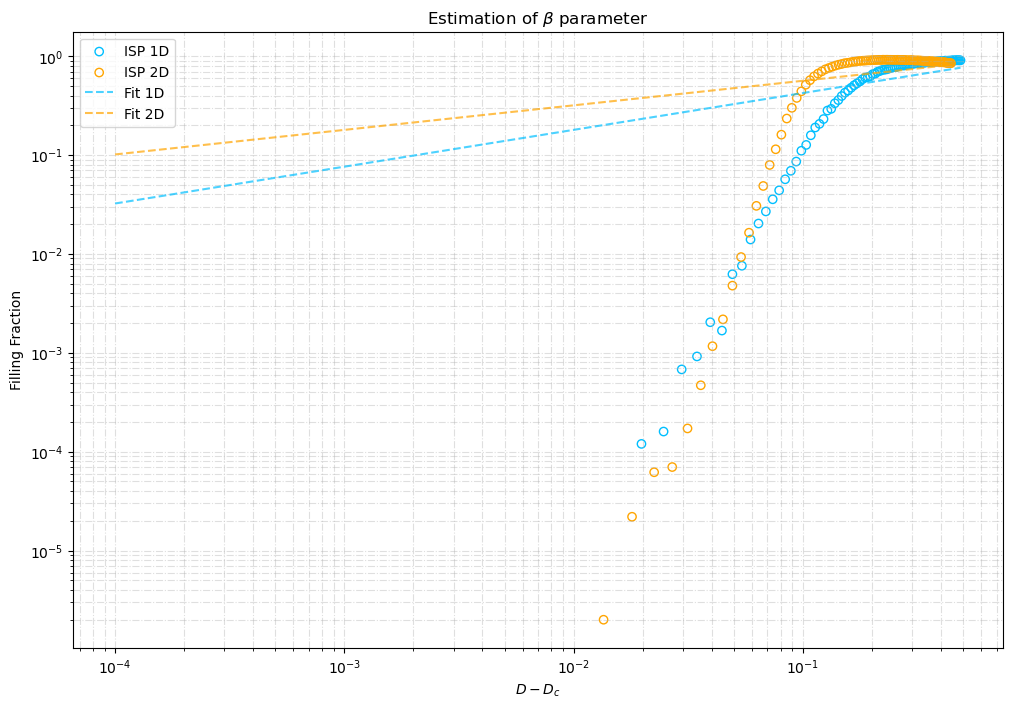

Best estimate of parameter beta for ISP 1D: (0.37240 ± 0.02497)
Best estimate of parameter beta for ISP 2D: (0.24838 ± 0.02193)


/tmp/ipykernel_220390/2417681567.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Best estimate of parameter beta for ISP 1D: ({float(best_beta1):.5f} ± {float(best_error1):.5f})")
/tmp/ipykernel_220390/2417681567.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Best estimate of parameter beta for ISP 2D: ({float(best_beta2):.5f} ± {float(best_error2):.5f})")


In [ ]:

#Fit
best_beta1, best_cov1 = curve_fit(f=StationaryDensity1,xdata=Dxspan1,ydata=fillings1[1,:],p0=0.5,maxfev=1000)
best_beta2, best_cov2 = curve_fit(f=StationaryDensity2,xdata=Dxspan2,ydata=fillings2[1,:],p0=0.54)
best_error1 = np.sqrt(np.diag(best_cov1))
best_error2 = np.sqrt(np.diag(best_cov2))

plt.figure(figsize=(12,8))
plt.scatter(fillings1[0,:]-Dc1,fillings1[1,:],edgecolors='deepskyblue',facecolors='none',label='ISP 1D')
plt.scatter(fillings2[0,:]-Dc2,fillings2[1,:],edgecolors='orange',facecolors='none',label='ISP 2D')
plt.plot(fillings1[0,:]-Dc1,StationaryDensity1(fillings1[0,:],best_beta1),c='deepskyblue',linestyle='--',label='Fit 1D',alpha=0.7)
plt.plot(fillings2[0,:]-Dc2,StationaryDensity2(fillings2[0,:],best_beta2),c='orange',linestyle='--',label='Fit 2D',alpha=0.7)
plt.xlabel(r'$D-D_c$')
plt.ylabel('Filling Fraction')
plt.xscale('log')
plt.yscale('log')
plt.grid(True,which='both',alpha=0.4,linestyle='-.')
plt.title(r'Estimation of $\beta$ parameter')
m.add_par_box({r'$Dx2$':local_par2['Dx'], r'$\beta2$':best_beta2,
               r'$Dx1$':local_par1['Dx'], r'$\beta1$':best_beta1})
plt.legend()
plt.savefig('plots/beta.png')
plt.show()

print(f"Best estimate of parameter beta for ISP 1D: ({float(best_beta1):.5f} ± {float(best_error1):.5f})")
print(f"Best estimate of parameter beta for ISP 2D: ({float(best_beta2):.5f} ± {float(best_error2):.5f})")

The best estimates of the parameter $\beta$ are:
- ISP 1D: $\beta = (0.37240   \pm 0.02497)$
- ISP 2D: $\beta = (0.24838 \pm 0.02193)$
### $\nu_\parallel$

ST: set#0
ST: set#0


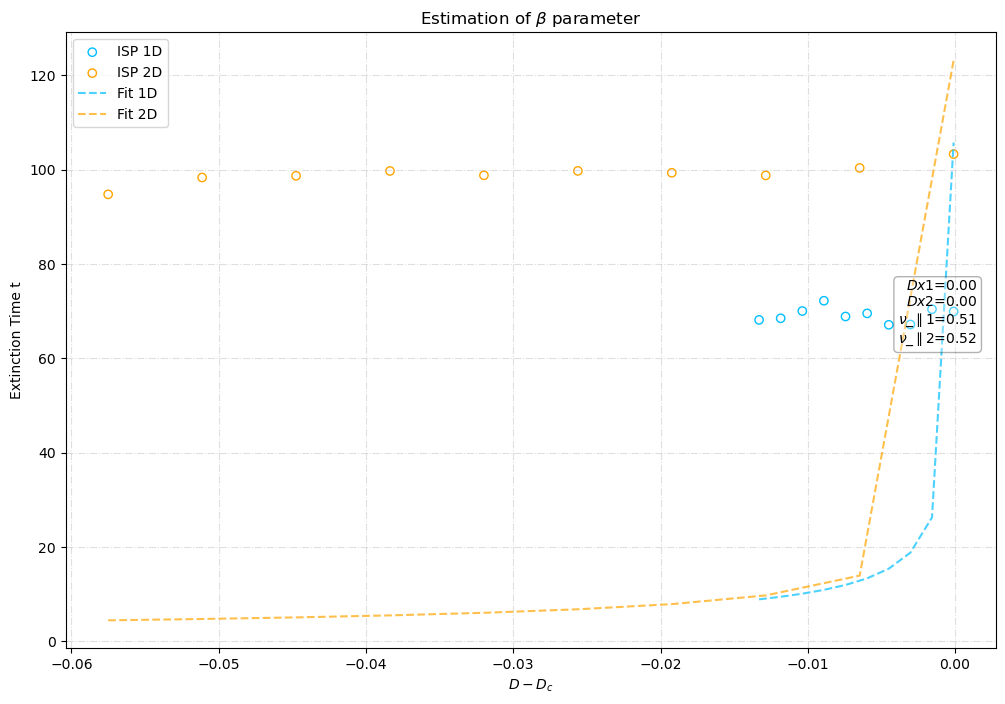

Best estimate of parameter nu_parallel for ISP 1D: (0.50610 ± 0.05641)
Best estimate of parameter nu_parallel for ISP 2D: (0.52266 ± 0.08067)


/tmp/ipykernel_250778/411984465.py:69: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Best estimate of parameter nu_parallel for ISP 1D: ({float(best_nuP1):.5f} ± {float(best_error1):.5f})")
/tmp/ipykernel_250778/411984465.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Best estimate of parameter nu_parallel for ISP 2D: ({float(best_nuP2):.5f} ± {float(best_error2):.5f})")


In [ ]:
Dc1 = 0.01341 #DP_threshold1
Dc2 = 0.0576 #DP_threshold2
Dxspan1 = np.linspace(1e-4,Dc1-1e-4,num=10)
Dxspan2 = np.linspace(1e-4,Dc2-1e-4,num=10)

def TemporalScale1(x,nu_p):
    return np.abs(x-Dc1)**(-nu_p)
def TemporalScale2(x,nu_p):
    return np.abs(x-Dc2)**(-nu_p)

n_iter = 50     # number of iterations per set of parameters
models = [m.lattice1,m.lattice2,m.lattice3]
time_steps = 250
max_workers = min(os.cpu_count() or 1,n_iter,8)

dim = 1
model = models[dim-1]
local_par1 = par.copy()
N1 = 500
mean_extinction1 = np.zeros(Dxspan1.shape[0])
for i,Dx in enumerate(Dxspan1):
    if i % 10 == 0:
        print(f'ST: set#{i}')
    args = [(N1,time_steps,local_par1,2)]*n_iter
    extinction_mat1 = np.zeros((n_iter))
    with concurrent.futures.ProcessPoolExecutor(max_workers=max_workers) as exe:
        for j,res in enumerate(exe.map(model,args)):
            extinction_mat1[j] = np.min(np.arange(1,time_steps+1)[res == 0])
    mean_extinction1[i] = np.mean(extinction_mat1)

dim = 2
model = models[dim-1]
local_par2 = par.copy()
N2 = 100
mean_extinction2 = np.zeros(Dxspan2.shape[0])
for i,Dx in enumerate(Dxspan2):
    if i % 10 == 0:
        print(f'ST: set#{i}')
    args = [(N2,time_steps,local_par2,2)]*n_iter
    extinction_mat2 = np.zeros((n_iter))
    with concurrent.futures.ProcessPoolExecutor(max_workers=max_workers) as exe:
        for j,res in enumerate(exe.map(model,args)): 
            extinction_mat2[j] = np.min(np.arange(1,time_steps+1)[res == 0])
    mean_extinction2[i] = np.mean(extinction_mat2)
    
# Fit
best_nuP1, best_cov1 = curve_fit(f=TemporalScale1,xdata=Dxspan1,ydata=mean_extinction1,p0=1.4)
best_nuP2, best_cov2 = curve_fit(f=TemporalScale2,xdata=Dxspan2,ydata=mean_extinction2,p0=1.23)
best_error1 = np.sqrt(np.diag(best_cov1))
best_error2 = np.sqrt(np.diag(best_cov2))

plt.figure(figsize=(12,8))
plt.scatter(np.abs(Dxspan1-Dc1),mean_extinction1,edgecolors='deepskyblue',facecolors='none',label='ISP 1D')
plt.scatter(np.abs(Dxspan2-Dc2),mean_extinction2,edgecolors='orange',facecolors='none',label='ISP 2D')
plt.plot(np.abs(Dxspan1-Dc1),TemporalScale1(Dxspan1,best_nuP1),c='deepskyblue',linestyle='--',label='Fit 1D',alpha=0.7)
plt.plot(np.abs(Dxspan2-Dc2),TemporalScale2(Dxspan2,best_nuP2),c='orange',linestyle='--',label='Fit 2D',alpha=0.7)
plt.xlabel(r'$D-D_c$')
plt.ylabel('Extinction Time t')
#plt.xscale('log')
#plt.yscale('log')
plt.grid(True,which='both',alpha=0.4,linestyle='-.')
plt.title(r'Estimation of $\beta$ parameter')
m.add_par_box({r'$Dx2$':local_par2['Dx'], r'$\nu_\parallel2$':best_nuP2,
               r'$Dx1$':local_par1['Dx'], r'$\nu_\parallel1$':best_nuP1})
plt.legend()
plt.savefig('plots/nuP.png')
plt.show()

print(f"Best estimate of parameter nu_parallel for ISP 1D: ({float(best_nuP1):.5f} ± {float(best_error1):.5f})")
print(f"Best estimate of parameter nu_parallel for ISP 2D: ({float(best_nuP2):.5f} ± {float(best_error2):.5f})")